In [176]:
import numpy as np
from scipy.linalg import expm, fractional_matrix_power
import matplotlib.pyplot as plt

In [96]:
plt.style.use('dark_background')

In [97]:
def view_4rank_tensor(tensor):
    fig, axes = plt.subplots(tensor.shape[0], tensor.shape[1], 
                             figsize=(tensor.shape[1]*2, tensor.shape[0]*2),
                             gridspec_kw={'wspace':0.05, 'hspace':0.05})
    for i in range(tensor.shape[0]):
        for j in range(tensor.shape[1]):
            ax = axes[i, j]
            im = ax.imshow(tensor[i, j], cmap='viridis', aspect='auto')
            ax.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.show()

In [98]:
def eye_4(shape, dtype):
    return np.fromfunction((lambda x, y, z, w: (x == y) * (z == w)), shape, dtype=dtype)

def exp_4(x, precision=10e-100):
    S = 0.0
    q = eye_4(x.shape, dtype = x.dtype)
    i = 1
    while True:
        S += q
        q = q @ x / i
        i += 1
        if np.sum(q**2) < precision**2:
            return S

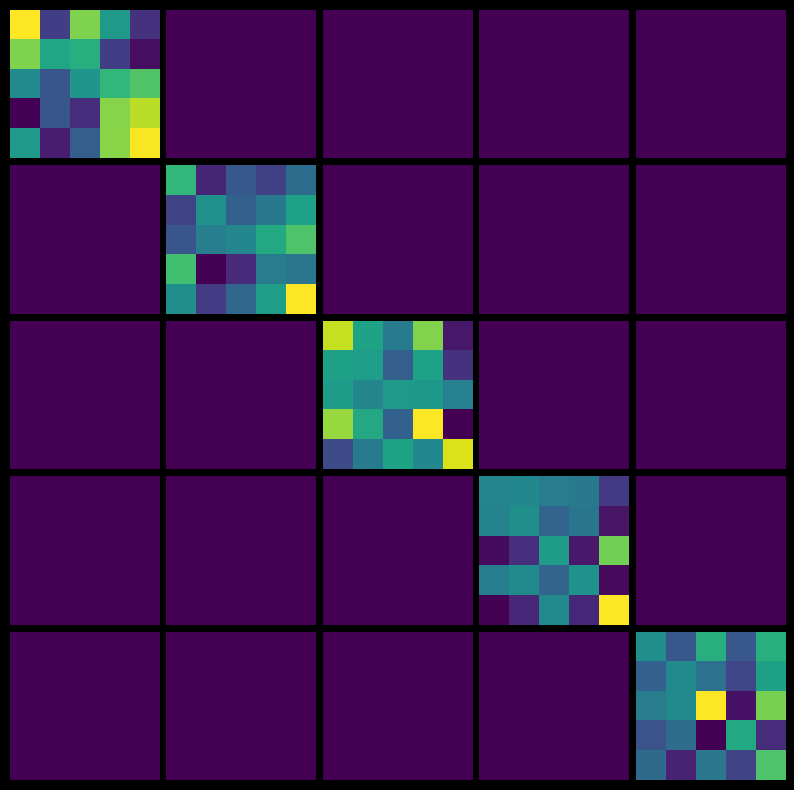

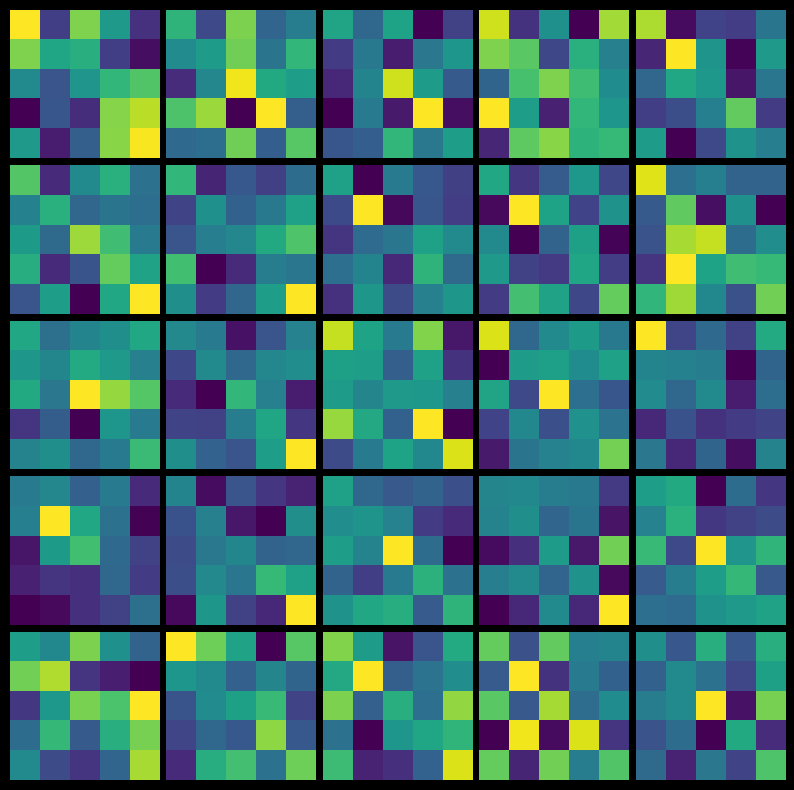

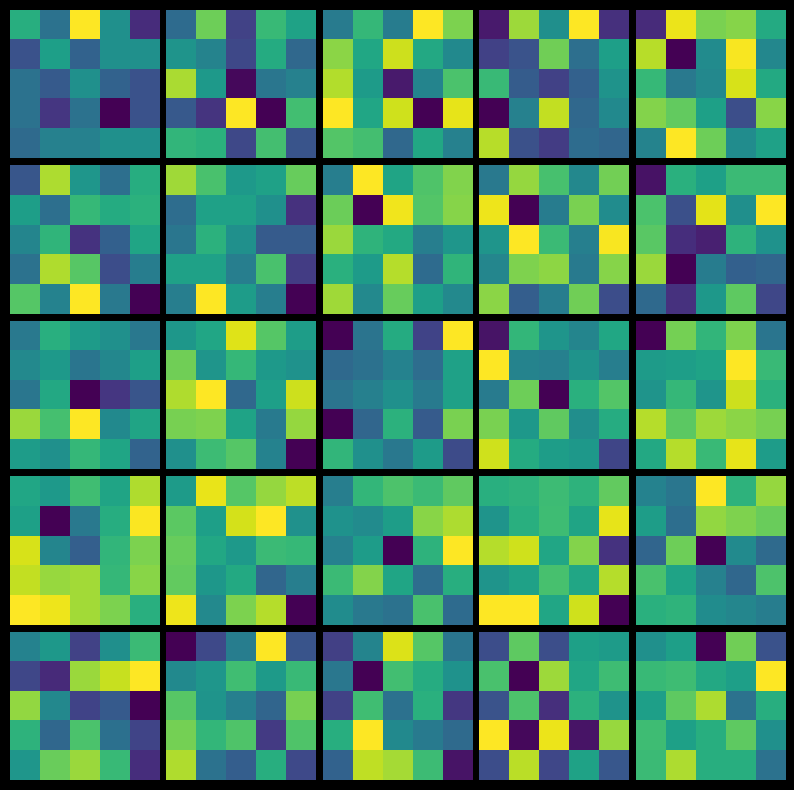

In [116]:
a = np.random.uniform(-1, 1, [5, 5, 5, 5])
t = np.random.uniform(-1, 1, [5, 5])
view_4rank_tensor(u := exp_4(a))
view_4rank_tensor(v := expm(a))
view_4rank_tensor(u - v)

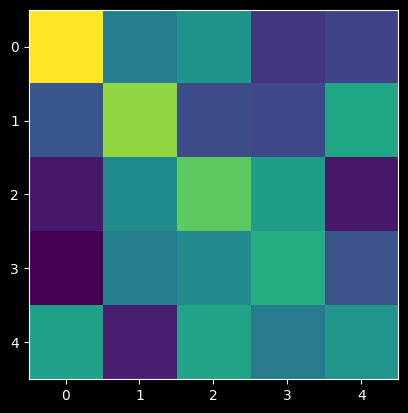

In [106]:
plt.imshow(expm(a[0][1]))
plt.show()

In [142]:
def mul_as_i_want(a, b):
    return np.einsum("iknl, kjlm -> ijnm", a, b)

In [145]:
def exp_4_i_want(x, precision=10e-100):
    S = 0.0
    q = eye_4(x.shape, dtype = x.dtype)
    i = 1
    while True:
        S += q
        q = mul_as_i_want(q, x) / i
        i += 1
        if np.sum(q**2) < precision**2:
            return S

In [170]:
a = np.random.uniform(-1, 1, [5, 5, 5, 5])
t = np.random.uniform(-1, 1, [1, 1, 5, 5])

In [171]:
#view_4rank_tensor(u := exp_4_i_want(mul_as_i_want(a, t)))
mul_as_i_want(a, t).shape

(5, 1, 5, 5)

In [144]:
a = np.random.uniform(-1, 1, (3, 3, 2, 2))
b = np.random.uniform(-1, 1, (1, 3, 2, 2))
print((a @ b).shape)
print(np.einsum("iknl, kjlm -> ijnm", a, b).shape)
(np.einsum("iknl, kjlm -> ijnm", a, b)) - (b @ a)

(3, 3, 2, 2)
(3, 3, 2, 2)


array([[[[-1.02461137,  0.22357974],
         [ 0.06996873,  0.71763002]],

        [[ 0.49254203, -0.83898219],
         [-1.72398285, -0.47816756]],

        [[-0.32509267,  0.36862994],
         [-0.96355874,  1.27999502]]],


       [[[ 0.35676215, -1.4768112 ],
         [ 0.48708465,  0.50610554]],

        [[ 0.81128008,  1.42885212],
         [-0.19475824, -0.42821784]],

        [[ 1.4914941 , -0.95572825],
         [ 0.38901095,  1.45754416]]],


       [[[ 0.24466622, -0.09797757],
         [-0.62951162,  0.38394429]],

        [[-0.78597384, -1.07034196],
         [ 0.58082289,  0.03133475]],

        [[-1.45845349,  0.06321761],
         [-0.45228142,  0.24741871]]]])

In [268]:
N = 4
x = np.random.uniform(-1, 1, (N))
W = np.random.uniform(-1, 1, (N, N, N))

W = (W - W.T)
#W *= (1 - np.eye(N))
print(W)
x @ W @ x

[[[ 0.          1.11306787  0.35085554  0.26081669]
  [ 0.         -0.99498227  0.56314677  0.1240118 ]
  [ 0.          0.46504192 -0.10286548 -1.05870757]
  [ 0.         -0.62385022 -1.51563548 -0.51701962]]

 [[-1.11306787  0.         -1.3989859  -0.69187659]
  [ 0.99498227  0.          0.27665518 -0.29471374]
  [-0.46504192  0.         -0.21809934  0.89951174]
  [ 0.62385022  0.          0.08167646 -0.04484951]]

 [[-0.35085554  1.3989859   0.          0.90521602]
  [-0.56314677 -0.27665518  0.         -1.40794262]
  [ 0.10286548  0.21809934  0.          1.24271915]
  [ 1.51563548 -0.08167646  0.         -0.36086314]]

 [[-0.26081669  0.69187659 -0.90521602  0.        ]
  [-0.1240118   0.29471374  1.40794262  0.        ]
  [ 1.05870757 -0.89951174 -1.24271915  0.        ]
  [ 0.51701962  0.04484951  0.36086314  0.        ]]]


array([ 0.0896123 , -0.821873  , -1.66820593, -0.45128312])

In [269]:
D = (W + np.transpose(W, (0, 2, 1)))
expm(D*3) @ x

array([[ 1.55285275e+02,  2.46397881e+02,  6.26743383e+02,
        -5.01713683e+02],
       [ 1.24726678e+01,  8.12012957e+00, -1.94444768e+01,
        -1.50801191e+01],
       [-8.00764811e+01,  2.74131903e+01, -5.88521638e+01,
        -1.04214977e+02],
       [-6.53965299e-01, -5.53638496e-01, -2.27850889e-01,
        -1.05070105e+00]])

In [212]:
np.abs((W @ x + x @ W) - ((W + np.transpose(W, (0, 2, 1))) @ x)) < 0.0001

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [280]:
d = W @ W @ W



print(x @ d @ x)
#print(W @ (W @ x))
x @ W @ W @ W @ x

[ 0.00903574 -2.5873298  -6.64779149  1.20111985]


array([[ 0.00903574, -0.43739484, -1.83427515, -0.01698494],
       [-0.07091363, -2.5873298 , -3.15705436, -1.27194445],
       [-0.06922137, -4.25354075, -6.64779149, -2.29049461],
       [-0.80038339,  0.72037634,  0.1041206 ,  1.20111985]])

In [ ]:
class solver:
  def __init__(self, dt = 0.1, **rules):
    self.rules = rules
    self.params = rules.keys()
    self.dt = dt

  def update(self):
    self.set_to(**{name:getattr(self, name) + self.rules[name](**{name:getattr(self, name) for name in self.rules})*self.dt for name in self.rules})

  def set_to(self, **values):
    for j in values:
      setattr(self, j, values[j])

  def solve(self, t_end, t_start = 0):
    self.t = t_start
    history = {name:[] for name in self.rules}
    history['t'] = []
    while self.t < t_end:
      self.update()
      for j in history:
        history[j].append(getattr(self, j))
      self.t += self.dt
    delattr(self, 't')
    for j in history:
      history[j] = np.array(history[j])
    return history

class xwx(solver):
    def __init__(self, W, dt=0.1):
        self.W = W
        super().__init__(dt, x = lambda x: x @ self.W @ x)